In [38]:
import tensorflow as tf

x=tf.constant([1.3, 3.2, 3.3, 4.3,5.2, 6.1])
y=tf.constant([1.3, 2.1, 3.2,4.3, 5.4,6.2])

print('Elements in array x')
with tf.name_scope ("ElementsofArray_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            op1 = sess.run(x[i])
            print(op1)
    
print('Elements in array y')
with tf.name_scope ("ElementsofArray_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            op2 = sess.run(y[i])
            print(op2)

Elements in array x
1.3
3.2
3.3
4.3
5.2
6.1
Elements in array y
1.3
2.1
3.2
4.3
5.4
6.2


In [39]:
#calculate mean of x and y
sum1=tf.constant(0)

with tf.name_scope("Mean_X"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            op3 =sess.run(x[i])
            sum1=tf.add(sum1,op3, name="AddX")
        a=tf.divide(sum1,len(sess.run(x)), name="DivideByN")
        avgx=sess.run(a)
    print('Mean of x')
    print(avgx)

sum1=tf.constant(0)
with tf.name_scope("Mean_Y"):
    with tf.Session() as sess:
        for i in range(len(sess.run(y))):
            op4 =sess.run(y[i])
            sum1=tf.add(sum1,op4, name="AddY")
        a=tf.divide(sum1,len(sess.run(y)), name="DivideByN")
        avgy=sess.run(a)
    print('Mean of y')
    print(avgy)


Mean of x
3.66666666667
Mean of y
3.5


In [40]:
#Calculate variance for x
var=tf.constant(0.0)
with tf.name_scope("Calculate_Variance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]), avgx, name="Sub")
            b=tf.square(a, name="Squaring")
            var=tf.add(var,b, name="Add")
        vari=sess.run(var)
print('Variance of x')
print(vari)


Variance of x
14.6267


In [41]:
#Calculate covariance of x & y
cov=tf.constant(0.0)
with tf.name_scope("Calculate_Covariance"):
    with tf.Session() as sess:
        for i in range(len(sess.run(x))):
            a=tf.subtract(sess.run(x[i]),avgx, name="Subtract1")
            b=tf.subtract(sess.run(y[i]),avgy, name="Subtract2")
            c=tf.multiply(a,b,name="Multiply")
            cov=tf.add(cov,c, name="AddThem")
        covar=sess.run(cov)
print('Covariance of x,y')
print(covar)
        

Covariance of x,y
15.96


In [59]:
#Calculate value of m
with tf.name_scope("Calculate_slope"):
    with tf.Session() as sess:
        m=tf.divide(cov,var)
        slope=sess.run(m)
print('Value of slope')
print(slope)


Value of slope
1.09116


In [60]:
#Calculate value of c 
with tf.name_scope("Calculate_c"):
    c=tf.to_float(slope)
    d=tf.to_float(avgx)
    e=tf.multiply(c,d)
    f=tf.to_float(avgy)
    s=tf.subtract(f,e)
    with tf.Session() as sess:
        const_c=sess.run(s)
print('The value of c')
print(const_c)

The value of c
-0.500912


In [31]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

/home/lavanyag/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [61]:
with tf.Session() as sess:
    x1=sess.run(x)
    y1=sess.run(y)
tr_X = numpy.asarray(x1)
tr_Y = numpy.asarray(y1)


randomX=tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
with tf.Session() as sess:
    randomX1=sess.run(randomX)
randomX2=numpy.asarray(randomX1)

randomY=[0]*6
    
with tf.Session() as sess:
        for i in range(len(sess.run(randomX))):
            output = sess.run(randomX[i])
            a=tf.multiply(output,slope)
            b=tf.add(a,const_c)
            randomY[i]=sess.run(b)
print(randomY)

[0.59024596, 1.6814036, 2.7725613, 3.863719, 4.9548769, 6.0460343]


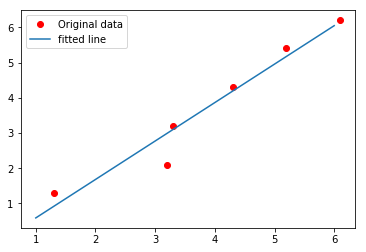

In [62]:
plt.plot(tr_X, tr_Y, 'ro', label='Original data')
plt.plot(randomX2, randomY, label='fitted line')
plt.legend()
plt.show()

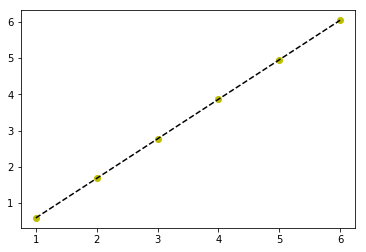

0.239394


In [63]:
#part2(b)
import numpy as np
xnp=np.asarray(randomX2)
ynp=np.asarray(randomY)

graph=np.polyfit(xnp,ynp,1)
fitfunc=np.poly1d(graph)

plt.plot(xnp,ynp, 'yo',xnp, fitfunc(xnp), '--k')
plt.show()
with tf.name_scope("Root_mean_square_error"):
    rmse=tf.sqrt(tf.reduce_mean(tf.squared_difference(randomX2,randomY)))
    
    with tf.Session() as sess:
        print(sess.run(rmse))